In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import glob as gb
import cv2
import keras
import io
import typing
from keras import backend
import math
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Dropout, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
import itertools 

#Model Graphs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
from tensorflow.keras import layers

2024-05-02 17:20:16.453567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 17:20:16.453665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 17:20:16.588956: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_path='/kaggle/input/wheat-plant-diseases/data/train'
test_path='/kaggle/input/wheat-plant-diseases/data/test'
val_path='/kaggle/input/wheat-plant-diseases/data/valid'

In [4]:
traingen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
testgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validgen =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [5]:
train_ds=traingen.flow_from_directory(batch_size=64,directory=train_path,shuffle=True,
                                                 target_size=(224,224),class_mode='categorical')

test_ds=traingen.flow_from_directory(batch_size=64,directory=test_path,shuffle=False,target_size=(224,224), 
                                                 class_mode='categorical')

val_ds=traingen.flow_from_directory(batch_size=64,directory=val_path,shuffle=True,target_size=(224,224), 
                                                 class_mode='categorical')

Found 13104 images belonging to 15 classes.
Found 750 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [6]:
def show_samples(gen, classes):
    num_classes = len(classes)

    fig, axes = plt.subplots(3, 5, figsize=(15, 8))
    axes = axes.ravel()

    for class_index in range(num_classes):
        images, labels = next(gen)
        class_images = images[0]
        class_name = classes[class_index]

        axes[class_index].imshow(class_images)
        axes[class_index].set_title(class_name, color='blue', fontsize=12)
        axes[class_index].axis('off')

    plt.tight_layout()
    plt.show()

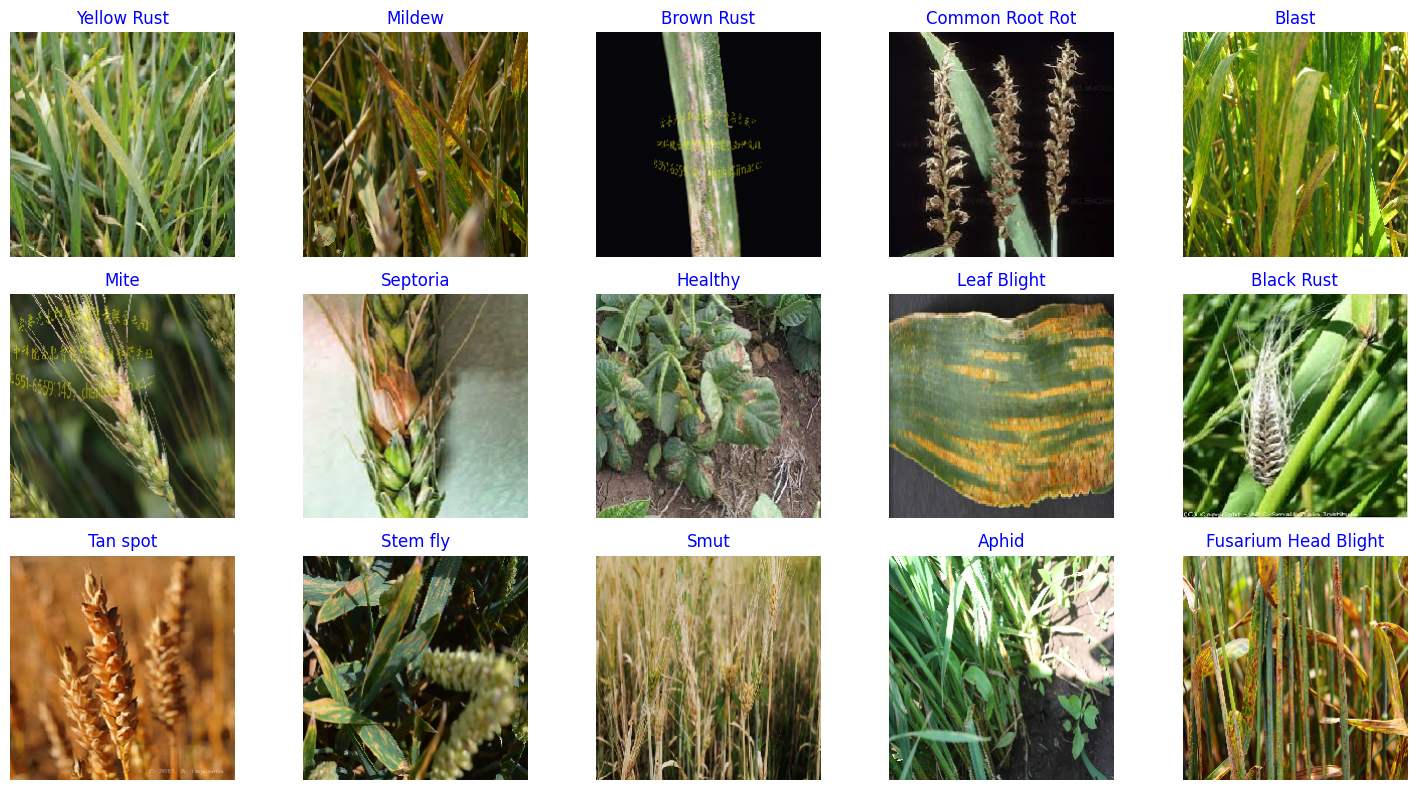

In [7]:
import os
classes = os.listdir('/kaggle/input/wheat-plant-diseases/data/train/')
show_samples(train_ds, classes)

# **Deep Learning Model**

In [8]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
from tensorflow.keras import layers, models
input_layer = base_model.input

# Global average pooling layer
global_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

model = layers.Flatten()(global_layer)
dense = layers.Dense(64, activation='relu')(model)
dense = layers.Dense(64, activation='relu')(model)

# Prediction layer
prediction_layer = layers.Dense(15, activation='softmax')(dense)

# Define the model
model = models.Model(inputs=input_layer, outputs=prediction_layer)

In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,295,439 (12.57 MB)

 Trainable params: 66,575 (260.06 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [14]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [15]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(beta_1=0.9,
    beta_2=0.999),
    metrics=[keras.metrics.CategoricalAccuracy(name="accuracy")],
)

In [16]:
history = model.fit(train_ds,
                 validation_data=val_ds,batch_size=64,epochs=30,
                    verbose=1 , callbacks=[es])

Epoch 1/30
  1/205 ━━━━━━━━━━━━━━━━━━━━ 1:12:05 21s/step - accuracy: 0.0938 - loss: 3.3933

I0000 00:00:1714670620.006055     131 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


205/205 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.4779 - loss: 1.6747 - val_accuracy: 0.6300 - val_loss: 1.2704
Epoch 2/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 209s 982ms/step - accuracy: 0.7542 - loss: 0.7775 - val_accuracy: 0.6967 - val_loss: 1.0589
Epoch 3/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 208s 983ms/step - accuracy: 0.7998 - loss: 0.6378 - val_accuracy: 0.7700 - val_loss: 1.0040
Epoch 4/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 208s 986ms/step - accuracy: 0.8386 - loss: 0.5168 - val_accuracy: 0.7833 - val_loss: 1.0050
Epoch 5/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.8552 - loss: 0.4549 - val_accuracy: 0.7733 - val_loss: 1.0232
Epoch 6/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.8808 - loss: 0.3810 - val_accuracy: 0.8133 - val_loss: 1.0482
Epoch 7/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.8939 - loss: 0.3423 - val_accuracy: 0.8267 - val_loss: 0.9539
Epoch 8/30
205/205 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9022 - loss: 0.3056 - val_accura

# **Model Evaluations**

In [17]:
from tensorflow.keras.utils import to_categorical
y_pred = model.predict(test_ds)
y_pred2= to_categorical(np.argmax(y_pred, axis=1), 15)

y_test= to_categorical(test_ds.labels, 15)

# Using it in AUC
y_pred1=(np.argmax(y_pred, axis=1))
y_test1=(np.argmax(y_test, axis=1))

12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step 


In [18]:
# Computing the Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
def Accuracy(y_test , y_pred):
    AccScore = accuracy_score(y_test, y_pred, normalize=True)
    return AccScore

In [19]:
#Computing the Precision metric (Some times called Specificity): #(True Positives / float(True Positives + False Posivites))  
def macro_precision(y_test , y_pred):
    PrecisionScore = precision_score(y_test, y_pred, average='macro') 
    return PrecisionScore

In [20]:
#Computing the Recall Score : (Some times called Sensitivity) (TP / float(TP + FN))   1 / 1+2  
def macro_recall(y_test , y_pred):
    RecallScore = recall_score(y_test, y_pred, average='macro') 
    return  RecallScore

In [21]:
#Computing the F1 Score  : 2 * (precision * recall) / (precision + recall)
def macro_F1Score(y_test , y_pred):
    F1Score = f1_score(y_test, y_pred, average='macro') 
    return F1Score

In [22]:
from sklearn.metrics import roc_auc_score

# Calculating Area under the curve
def AUC(actual_class, pred_class, average="micro"):
    # Making a set of all the unique classes
    unique_class = set(actual_class)
    roc_auc_dict = {}
    total_auc = 0  # Variable to store the total AUC score

    for per_class in unique_class:
        # Making a list of all the classes except the current class
        other_class = [x for x in unique_class if x != per_class]

        # Making the current class with label 1 and all other classes as a label 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        # Calculating the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average=average)
        roc_auc_dict[per_class] = roc_auc
        total_auc += roc_auc

    # Calculating the average AUC score for all classes
    average_auc = total_auc / len(unique_class)

    return roc_auc_dict, average_auc

In [23]:
print("***** Model Evaluations Details ******** \n")
print("Test loss, Test acc : " , model.evaluate(test_ds)) 
print("******************************")
print("Accurayc  : " , Accuracy(test_ds.classes , y_pred1)) 
print("******************************")
print("Precision Score is : " , macro_precision(test_ds.classes , y_pred1))
print("******************************")
print("Recall Scores is : " , macro_recall(test_ds.classes , y_pred1))
print("******************************")
print('F1 Score is : ', macro_F1Score(test_ds.classes , y_pred1))
print("******************************")
roc_auc_dict, average_auc = AUC(test_ds.classes, y_pred1)
print('AUC Score for each class  : ' , roc_auc_dict)
print('AUC Average Score   : ' , average_auc)

***** Model Evaluations Details ******** 

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 599ms/step - accuracy: 0.9133 - loss: 1.1938
Test loss, Test acc :  [1.3385021686553955, 0.9013333320617676]
******************************
Accurayc  :  0.9013333333333333
******************************
Precision Score is :  0.8933893635955045
******************************
Recall Scores is :  0.9013333333333333
******************************
F1 Score is :  0.8844632486176907
******************************
AUC Score for each class  :  {0: 0.9978571428571428, 1: 0.9978571428571428, 2: 0.9985714285714286, 3: 0.9299999999999999, 4: 0.98, 5: 1.0, 6: 0.5264285714285715, 7: 0.955, 8: 0.95, 9: 0.9685714285714284, 10: 0.9664285714285714, 11: 0.9892857142857143, 12: 1.0, 13: 0.9771428571428572, 14: 0.97}
AUC Average Score   :  0.9471428571428571


In [24]:
labels=["Class 0","Class 1","Class 2","Class 3" , "Class 4","Class 5","Class 6","Class 7"  , "Class 8","Class 9","Class 10","Class 11" , "Class 12","Class 13","Class 14" ]

In [25]:
print(classification_report(test_ds.classes, y_pred1,target_names=labels))


              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97        50
     Class 1       0.94      1.00      0.97        50
     Class 2       0.96      1.00      0.98        50
     Class 3       1.00      0.86      0.92        50
     Class 4       1.00      0.96      0.98        50
     Class 5       1.00      1.00      1.00        50
     Class 6       0.38      0.06      0.10        50
     Class 7       0.87      0.92      0.89        50
     Class 8       1.00      0.90      0.95        50
     Class 9       0.96      0.94      0.95        50
    Class 10       0.90      0.94      0.92        50
    Class 11       0.98      0.98      0.98        50
    Class 12       1.00      1.00      1.00        50
    Class 13       0.92      0.96      0.94        50
    Class 14       0.54      1.00      0.70        50

    accuracy                           0.90       750
   macro avg       0.89      0.90      0.88       750
weighted avg       0.89   

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.style.library['seaborn-whitegrid']

RcParams({'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.grid': True,
          'axes.labelcolor': '.15',
          'axes.linewidth': 1.0,
          'figure.facecolor': 'white',
          'font.family': ['sans-serif'],
          'font.sans-serif': ['Arial',
                              'Liberation Sans',
                              'DejaVu Sans',
                              'Bitstream Vera Sans',
                              'sans-serif'],
          'grid.color': '.8',
          'grid.linestyle': '-',
          'image.cmap': 'Greys',
          'legend.frameon': False,
          'legend.numpoints': 1,
          'legend.scatterpoints': 1,
          'lines.solid_capstyle': <CapStyle.round: 'round'>,
          'text.color': '.15',
          'xtick.color': '.15',
          'xtick.direction': 'out',
          'xtick.major.size': 0.0,
          'xtick.minor.size': 0.0,
          'ytick.color': '.15',
          'ytick.direct

In [40]:
def plot_roc_curve(y_test,y_pred):
    n_classes=15
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    lw=2
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
    plt.figure(figsize=(10, 10))
    plt.plot(fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,)

    plt.plot(fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
    colors = cycle(["aqua", "darkorange", "cornflowerblue",'#9e9e9e','#b19a7e','#CD5C5C','#DFFF00',
                   '#DE3163','#ff4d4d','#CCCCFF','#800080','#4F1D25','#ccffcc','#ff0040'
                   ,'#4000ff','#0080ff','#ff8000','#666600','#b37700','#00b3b3','#003300','#FFC300','#A6F7BD',
                   '#A6BDF7','#CAA6F7','#F7A6AC','#ADF7A6','#F5F7A6','#F7CCA6','#EE4949',
                    '#DEA41F','#334471','#33716F','#343371','#772CE3','#B8BF20','#666B01','#0B6B01',
                    '#F4B708','#179690'
                   ])

    for i, color in zip(range(n_classes), colors):
        plt.plot(
           fpr[i],
           tpr[i],
           color=color,
           lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel("False Positive Rate" , weight='bold')
    plt.ylabel("True Positive Rate" , weight='bold')
    plt.title("Proposed-Model-Roc-Curve" , weight='bold')
    plt.legend(loc="lower right")
    plt.show()

In [41]:
def Acc_Loss_Graph(history):
    # converting hsitory to dataframe
    pd.DataFrame(history.history)

    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
    plt.title('Proposed-Model Accuracy' , weight='bold')
    plt.xlabel('Epochs' , weight='bold')
    plt.ylabel('Accuracy' , weight='bold')
    plt.legend()
    plt.show()

    pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
    plt.title('Proposed-Model Loss' , weight='bold')
    plt.xlabel('Epochs' , weight='bold')
    plt.ylabel('loss' , weight='bold')
    plt.legend()
    plt.show()
    

In [42]:
def Confusion_Matrix(y_test , y_pred):
    fig, ax = plt.subplots(figsize=(6,5))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=labels,ax=ax,xticks_rotation='vertical'
                                                  ,cmap="Blues")
    disp.ax_.set_title("CM Proposed" , weight='bold')

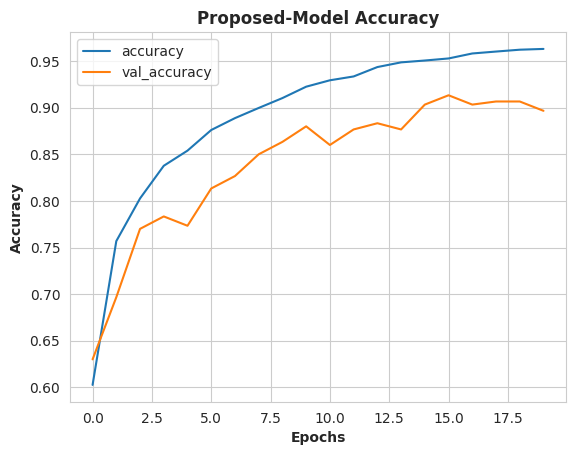

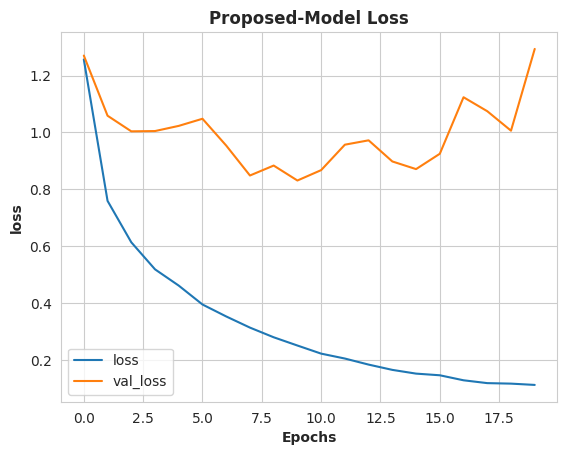

In [43]:
Acc_Loss_Graph(history)

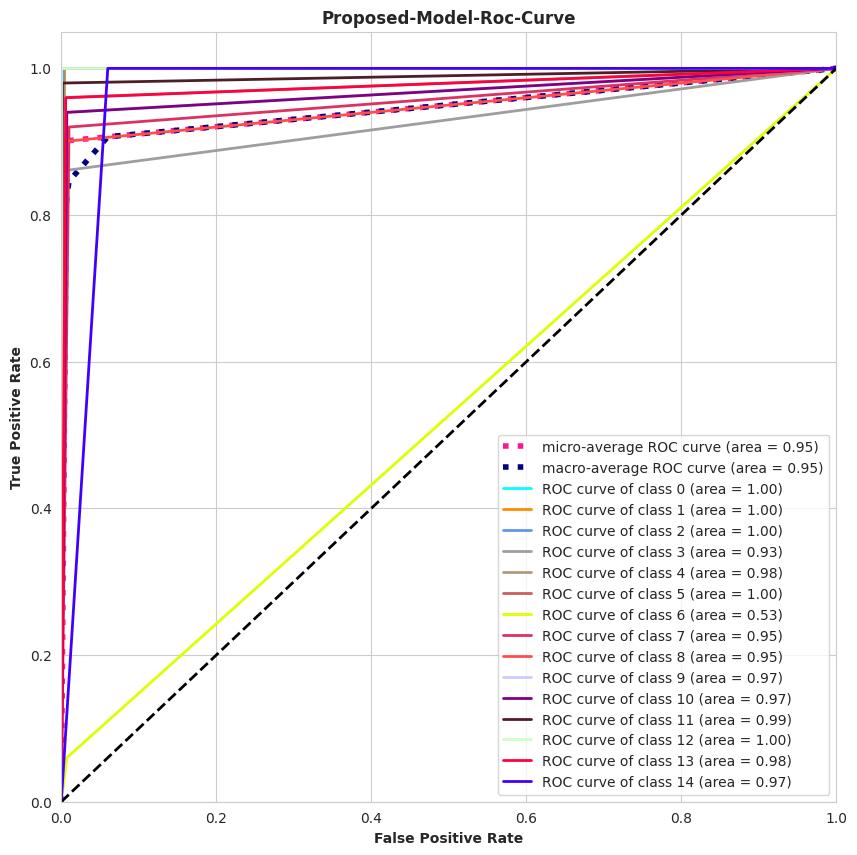

In [44]:
plot_roc_curve(y_test,y_pred2)

In [45]:
test_ds.classes.shape

(750,)

In [46]:
y_pred1.shape

(750,)

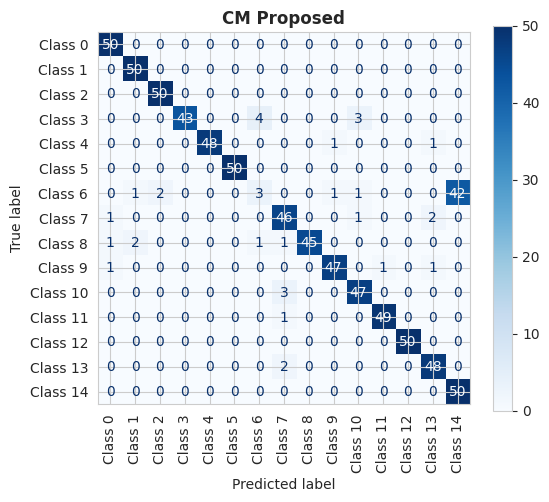

In [47]:
Confusion_Matrix(test_ds.classes , y_pred1)

# **Interpretable Deep Learning Grad-Cam**

In [48]:
preprocess_input = keras.applications.mobilenet.preprocess_input

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


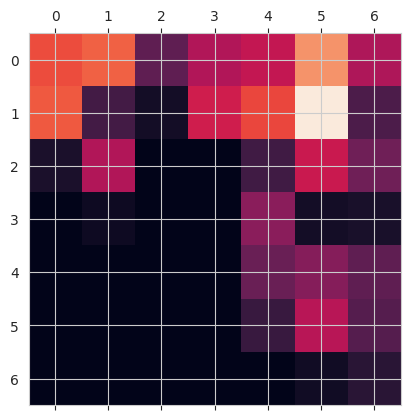

In [49]:
# Prepare image
decode_predictions = keras.applications.mobilenet.decode_predictions

img_path='/kaggle/input/wheat-plant-diseases/data/train/Aphid/aphid_0.png'
img_array = preprocess_input(get_img_array(img_path, size=(224,224,3)))

# Make model

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'conv_pw_13_relu')

# Display heatmap
plt.matshow(heatmap)
plt.show()

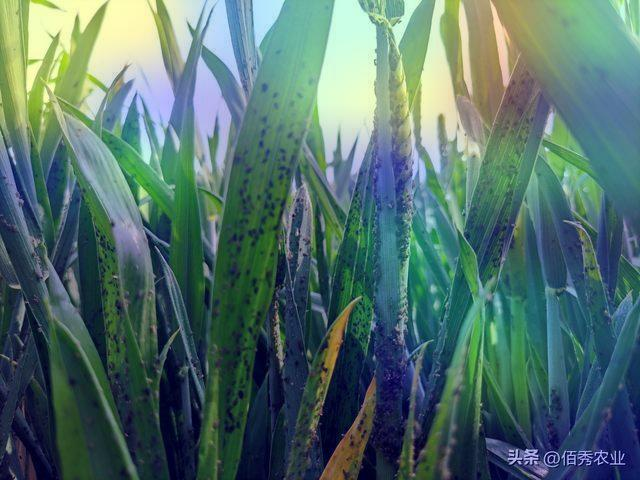

In [50]:
import matplotlib as mpl
from IPython.display import Image, display


def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [51]:
# Map class index to label name
index_to_label = {0: 'Aphid', 1: 'Black Rust', 2: 'Blast', 3: 'Brown Rust', 4: 'Common Root Rot',
                  5: 'Fusarium Head Blight', 6: 'Healthy', 7: 'Leaf Blight', 8: 'Mildew', 9: 'Mite',
                  10: 'Septoria', 11: 'Smut', 12: 'Stem fly', 13: 'Tan spot', 14: 'Yellow Rust'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


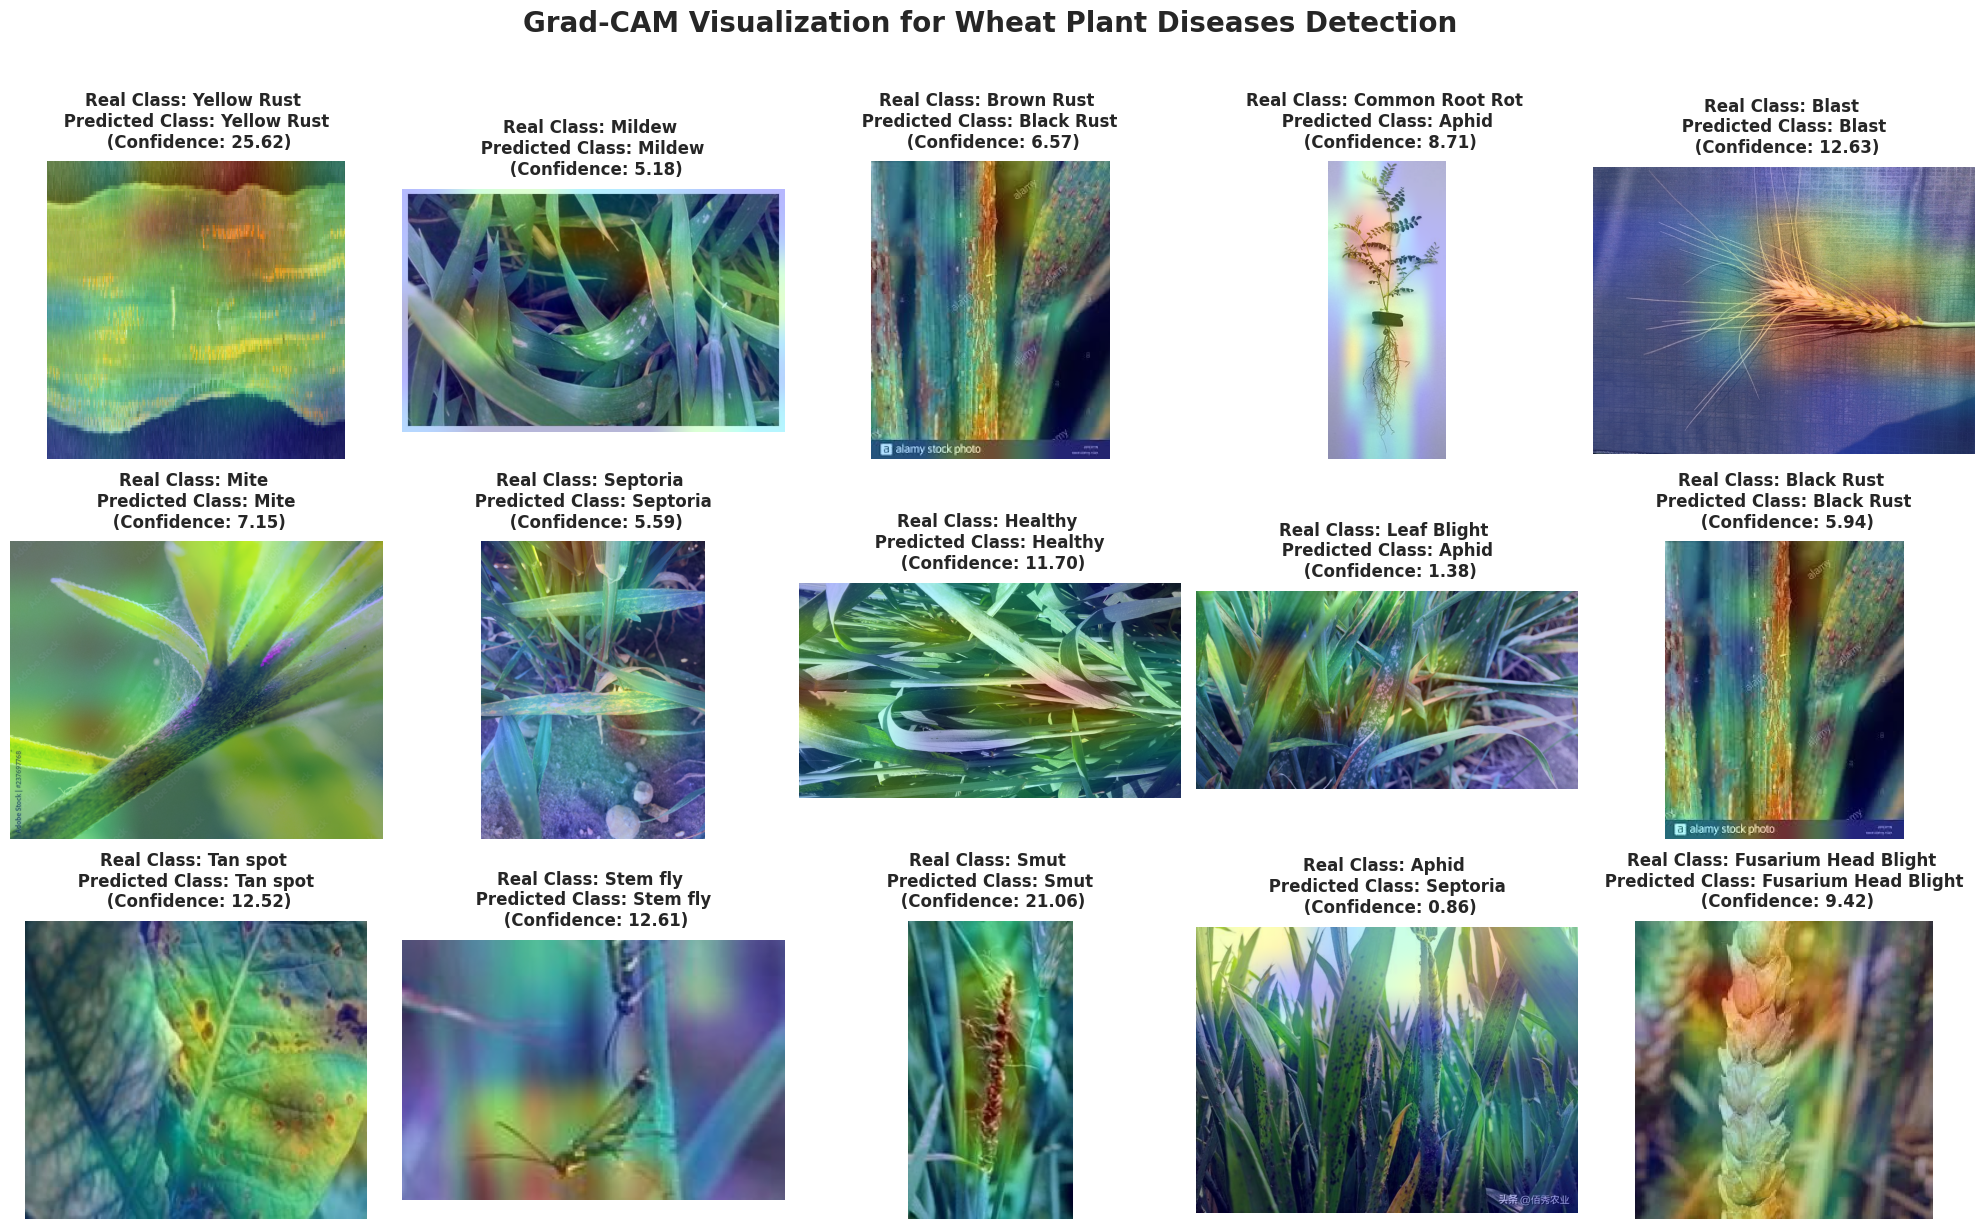

In [52]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import matplotlib as mpl
from IPython.display import Image, display

# Function to get the first image for each class
def get_first_image_for_each_class(data_dir):
    class_images = {}
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            image_filename = os.listdir(class_dir)[0]
            image_name, ext = os.path.splitext(image_filename)
            if not image_name.endswith('_0'):
                image_name = image_name.split('_')
                image_name[-1] = '0'
                image_name = '_'.join(image_name)
            class_images[class_name] = image_name + ext
    return class_images

# Get the first image for each class
data_dir = '/kaggle/input/wheat-plant-diseases/data/train/'
class_images = get_first_image_for_each_class(data_dir)

# Set the number of columns and rows for subplots
num_columns = 5
num_rows = 3

# Create subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, 12))

alpha = 0.4
# Iterate over each class image, apply Grad-CAM, and display
for i, (class_name, img_path) in enumerate(class_images.items()):
    # Preprocess the image
    img_array = preprocess_input(get_img_array(data_dir + class_name + "/" + img_path, size=(224, 224, 3)))
    
    # Predict the class label
    preds = model.predict(img_array)
    predicted_class_index = np.argmax(preds)
    predicted_class_label = index_to_label[predicted_class_index]
    
    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, 'conv_pw_13_relu')
    
    # Load the original image
    img = keras.utils.load_img(data_dir+class_name+"/"+img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)
    
    combined_img = superimposed_img
    
    # Display the combined image
    axs[i // num_columns, i % num_columns].imshow(combined_img)
    axs[i // num_columns, i % num_columns].set_title(f'Real Class: {class_name} \n Predicted Class: {predicted_class_label} \n (Confidence: {preds[0][predicted_class_index]:.2f})', fontweight='bold', pad=10)
    axs[i // num_columns, i % num_columns].axis('off')

fig.suptitle("Grad-CAM Visualization for Wheat Plant Diseases Detection", fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
